In [2]:
#用yfinance改寫，我們稍微修改一下，改成取得ETF50的1月至8月的股票資料。
import pandas as pd
import yfinance as yf
from datetime import datetime

# Load ETF50 stock IDs
etf50_df = pd.read_csv("ETF50.csv")
etf50_id = etf50_df.loc[:, "STOCK_ID"].astype(str)

frames = []
start_date = "2020-01-01"
end_date = "2024-08-28"

for stock_id in etf50_id:
    # Download historical data using yfinance
    ticker = f"{stock_id}.TW"
    df = yf.download(ticker, start=start_date, end=end_date)

    if not df.empty:
        # Calculate Trading_money
        df['Trading_money'] = df['Close'] * df['Volume']
        # Add the stock ID to the dataframe
        df['STOCK_ID'] = stock_id
        frames.append(df)

# Concatenate all dataframes
result_df = pd.concat(frames)
result_df = result_df.reset_index()

# Save to CSV
result_df.to_csv("2020-01-01-etf50-tech.csv", index=False, header=True)
print(result_df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

        Date   Open   High    Low  Close   Adj Close    Volume  Trading_money  \
0 2020-01-02  332.5  339.0  332.5  339.0  307.796692  31754120   1.076465e+10   
1 2020-01-03  344.0  345.0  335.5  339.5  308.250549  41811268   1.419493e+10   
2 2020-01-06  333.0  334.5  332.0  332.0  301.440979  45343057   1.505389e+10   
3 2020-01-07  332.5  333.0  326.5  329.5  299.171021  50879181   1.676469e+10   
4 2020-01-08  325.0  333.0  325.0  329.5  299.171021  37567748   1.237857e+10   

  STOCK_ID  
0     2330  
1     2330  
2     2330  
3     2330  
4     2330  


In [3]:
from pyod.models.lmdd import LMDD
from pyod.models.iforest import IForest

df = pd.read_csv("2020-01-01-etf50-tech.csv", dtype={"STOCK_ID": str})


# %%
# for stock_index in df.loc[:, "stock_id"].unique():

stock_df = df.groupby("STOCK_ID").get_group("2330")
stock_close = stock_df.loc[:, "Close"].to_numpy().reshape(-1, 1)

clf = LMDD(dis_measure="iqr")
clf.fit(stock_close)
stock_df.loc[:, "iqr"] = clf.labels_


clf = LMDD(dis_measure="var")
clf.fit(stock_close)
stock_df.loc[:, "std"] = clf.labels_

clf = IForest()
clf.fit(stock_close)
stock_df.loc[:, "iforest"] = clf.labels_
# %%
stock_df.loc[(stock_df.loc[:, "iqr"] == 1) | (stock_df.loc[:, "std"] == 1) | (stock_df.loc[:, "iforest"] == 1)]

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2728061402.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:, "iqr"] = clf.labels_
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2728061402.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:, "std"] = clf.labels_
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2728061402.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Date,Open,High,Low,Close,Adj Close,Volume,Trading_money,STOCK_ID,iqr,std,iforest
41,2020-03-11,309.0,310.5,302.0,302.0,274.202393,62216710,1.878945e+10,2330,0,1,0
42,2020-03-12,299.0,299.0,287.0,294.0,266.938721,113527351,3.337704e+10,2330,0,1,0
43,2020-03-13,275.0,294.0,272.5,290.0,263.306885,149995148,4.349859e+10,2330,0,1,0
44,2020-03-16,285.0,291.0,275.5,276.5,251.049484,103873228,2.872095e+10,2330,0,1,1
45,2020-03-17,265.0,276.5,265.0,268.0,243.331909,121323651,3.251474e+10,2330,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2024-08-21,961.0,964.0,956.0,958.0,958.000000,29758188,2.850834e+10,2330,1,1,1
1128,2024-08-22,958.0,964.0,948.0,951.0,951.000000,24349754,2.315662e+10,2330,1,1,1
1129,2024-08-23,944.0,952.0,939.0,949.0,949.000000,27592153,2.618495e+10,2330,1,1,1
1130,2024-08-26,957.0,961.0,945.0,950.0,950.000000,25057581,2.380470e+10,2330,1,1,1


In [4]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as pta
import seaborn as sns

# Filter the SettingWithCopyWarning using the warning message
warnings.filterwarnings("ignore", message=".*SettingWithCopyWarning.*")

pd.set_option("display.max_columns", None)


In [5]:

df = pd.read_csv("2020-01-01-etf50-tech.csv", dtype={"stock_id": str})
df = df.loc[df.loc[:, "Trading_money"] > 0]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Trading_money,STOCK_ID
0,2020-01-02,332.500000,339.000000,332.500000,339.000000,307.796692,31754120,1.076465e+10,2330
1,2020-01-03,344.000000,345.000000,335.500000,339.500000,308.250549,41811268,1.419493e+10,2330
2,2020-01-06,333.000000,334.500000,332.000000,332.000000,301.440979,45343057,1.505389e+10,2330
3,2020-01-07,332.500000,333.000000,326.500000,329.500000,299.171021,50879181,1.676469e+10,2330
4,2020-01-08,325.000000,333.000000,325.000000,329.500000,299.171021,37567748,1.237857e+10,2330
...,...,...,...,...,...,...,...,...,...
56560,2024-08-21,55.099998,55.400002,54.500000,54.599998,54.599998,8763143,4.784676e+08,2408
56561,2024-08-22,54.200001,55.200001,54.200001,54.799999,54.799999,5476202,3.000959e+08,2408
56562,2024-08-23,54.500000,54.500000,52.900002,54.099998,54.099998,12018856,6.502201e+08,2408
56563,2024-08-26,54.200001,54.900002,53.500000,53.799999,53.799999,7006986,3.769758e+08,2408


In [6]:

# Example moving average function
def MovingAverage(df, fun):
    df[f"{fun.__name__.upper()}5"] = fun(
        high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=5
    )

    df[f"{fun.__name__.upper()}60"] = fun(
        high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=60
    )

    return df

# Apply moving average function
stock_df = MovingAverage(stock_df, pta.sma)
print(stock_df.head())


         Date   Open   High    Low  Close   Adj Close    Volume  \
0  2020-01-02  332.5  339.0  332.5  339.0  307.796692  31754120   
1  2020-01-03  344.0  345.0  335.5  339.5  308.250549  41811268   
2  2020-01-06  333.0  334.5  332.0  332.0  301.440979  45343057   
3  2020-01-07  332.5  333.0  326.5  329.5  299.171021  50879181   
4  2020-01-08  325.0  333.0  325.0  329.5  299.171021  37567748   

   Trading_money STOCK_ID  iqr  std  iforest   SMA5  SMA60  
0   1.076465e+10     2330    0    0        0    NaN    NaN  
1   1.419493e+10     2330    0    0        0    NaN    NaN  
2   1.505389e+10     2330    0    0        0    NaN    NaN  
3   1.676469e+10     2330    0    0        0    NaN    NaN  
4   1.237857e+10     2330    0    0        0  333.9    NaN  


In [7]:
stock_df = MovingAverage(stock_df, pta.ema)

# Weighted Moving Average: wma
stock_df = MovingAverage(stock_df, pta.wma)

# Arnaud Legoux Moving Average
stock_df = MovingAverage(stock_df, pta.alma)

# Double Exponential Moving Average
stock_df = MovingAverage(stock_df, pta.dema)

# Fibonacci's Weighted Moving Average
stock_df = MovingAverage(stock_df, pta.fwma)

# Hull Exponential Moving Average
stock_df = MovingAverage(stock_df, pta.hma)

# Holt-Winter Moving Average
stock_df = MovingAverage(stock_df, pta.hwma)

In [8]:

# Ichimoku Kinkō Hyō
# stock_df = MovingAverage(stock_df, pta.ichimoku)

# Jurik Moving Average
stock_df = MovingAverage(stock_df, pta.jma)

# Kaufman's Adaptive Moving Average
stock_df = MovingAverage(stock_df, pta.kama)

# Linear Regression
stock_df = MovingAverage(stock_df, pta.linreg)

# McGinley Dynamic
stock_df = MovingAverage(stock_df, pta.mcgd)

# Midpoint
stock_df = MovingAverage(stock_df, pta.midpoint)

# Midprice
stock_df = MovingAverage(stock_df, pta.midprice)

# Open-High-Low-Close Average
# stock_df = MovingAverage(stock_df, pta.ohlc4)

# Pascal's Weighted Moving Average
stock_df = MovingAverage(stock_df, pta.pwma)

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/3143045898.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df[f"{fun.__name__.upper()}5"] = fun(
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/3143045898.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df[f"{fun.__name__.upper()}60"] = fun(


In [9]:
# WildeR's Moving Average
stock_df = MovingAverage(stock_df, pta.rma)

# Sine Weighted Moving Average
stock_df = MovingAverage(stock_df, pta.sinwma)

# Ehler's Super Smoother Filter
stock_df = MovingAverage(stock_df, pta.ssf)

# Symmetric Weighted Moving Average
stock_df = MovingAverage(stock_df, pta.swma)

# T3 Moving Average
stock_df = MovingAverage(stock_df, pta.t3)

# Triple Exponential Moving Average
stock_df = MovingAverage(stock_df, pta.tema)

# Triangular Moving Average
stock_df = MovingAverage(stock_df, pta.trima)

# Variable Index Dynamic Average
stock_df = MovingAverage(stock_df, pta.vidya)

# Volume Weighted Average Price
# stock_df = MovingAverage(stock_df, pta.vwap)

# Volume Weighted Moving Average
stock_df = MovingAverage(stock_df, pta.vwma)

# Zero Lag Moving Average
stock_df = MovingAverage(stock_df, pta.zlma)

In [11]:
# Subsequent analysis
df = pd.read_csv("2020-01-01-etf50-tech.csv", dtype={"STOCK_ID": str})

# Ensure all the columns you want to drop actually exist in the DataFrame
existing_columns = df.columns
columns_to_drop = [
    "Date", "STOCK_ID", "Trading_Volume", "Trading_money", "Open", 
    "Max", "Min", "Close", "Spread", "Trading_turnover", "yesterday_close"
]
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

MA_columns = df.drop(columns_to_drop, axis=1).columns
MA_df = df[MA_columns]

normalized_df = (MA_df - MA_df.mean()) / MA_df.std()
print(normalized_df.head())

       High       Low  Adj Close    Volume
0  0.125851  0.133532   0.129462  0.390786
1  0.137386  0.139496   0.130421  0.691874
2  0.117200  0.132538   0.116029  0.797608
3  0.114316  0.121604   0.111231  0.963347
4  0.114316  0.118622   0.111231  0.564832


/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2435323567.py:26: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pta.mcgd(
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2435323567.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pta.mcgd(


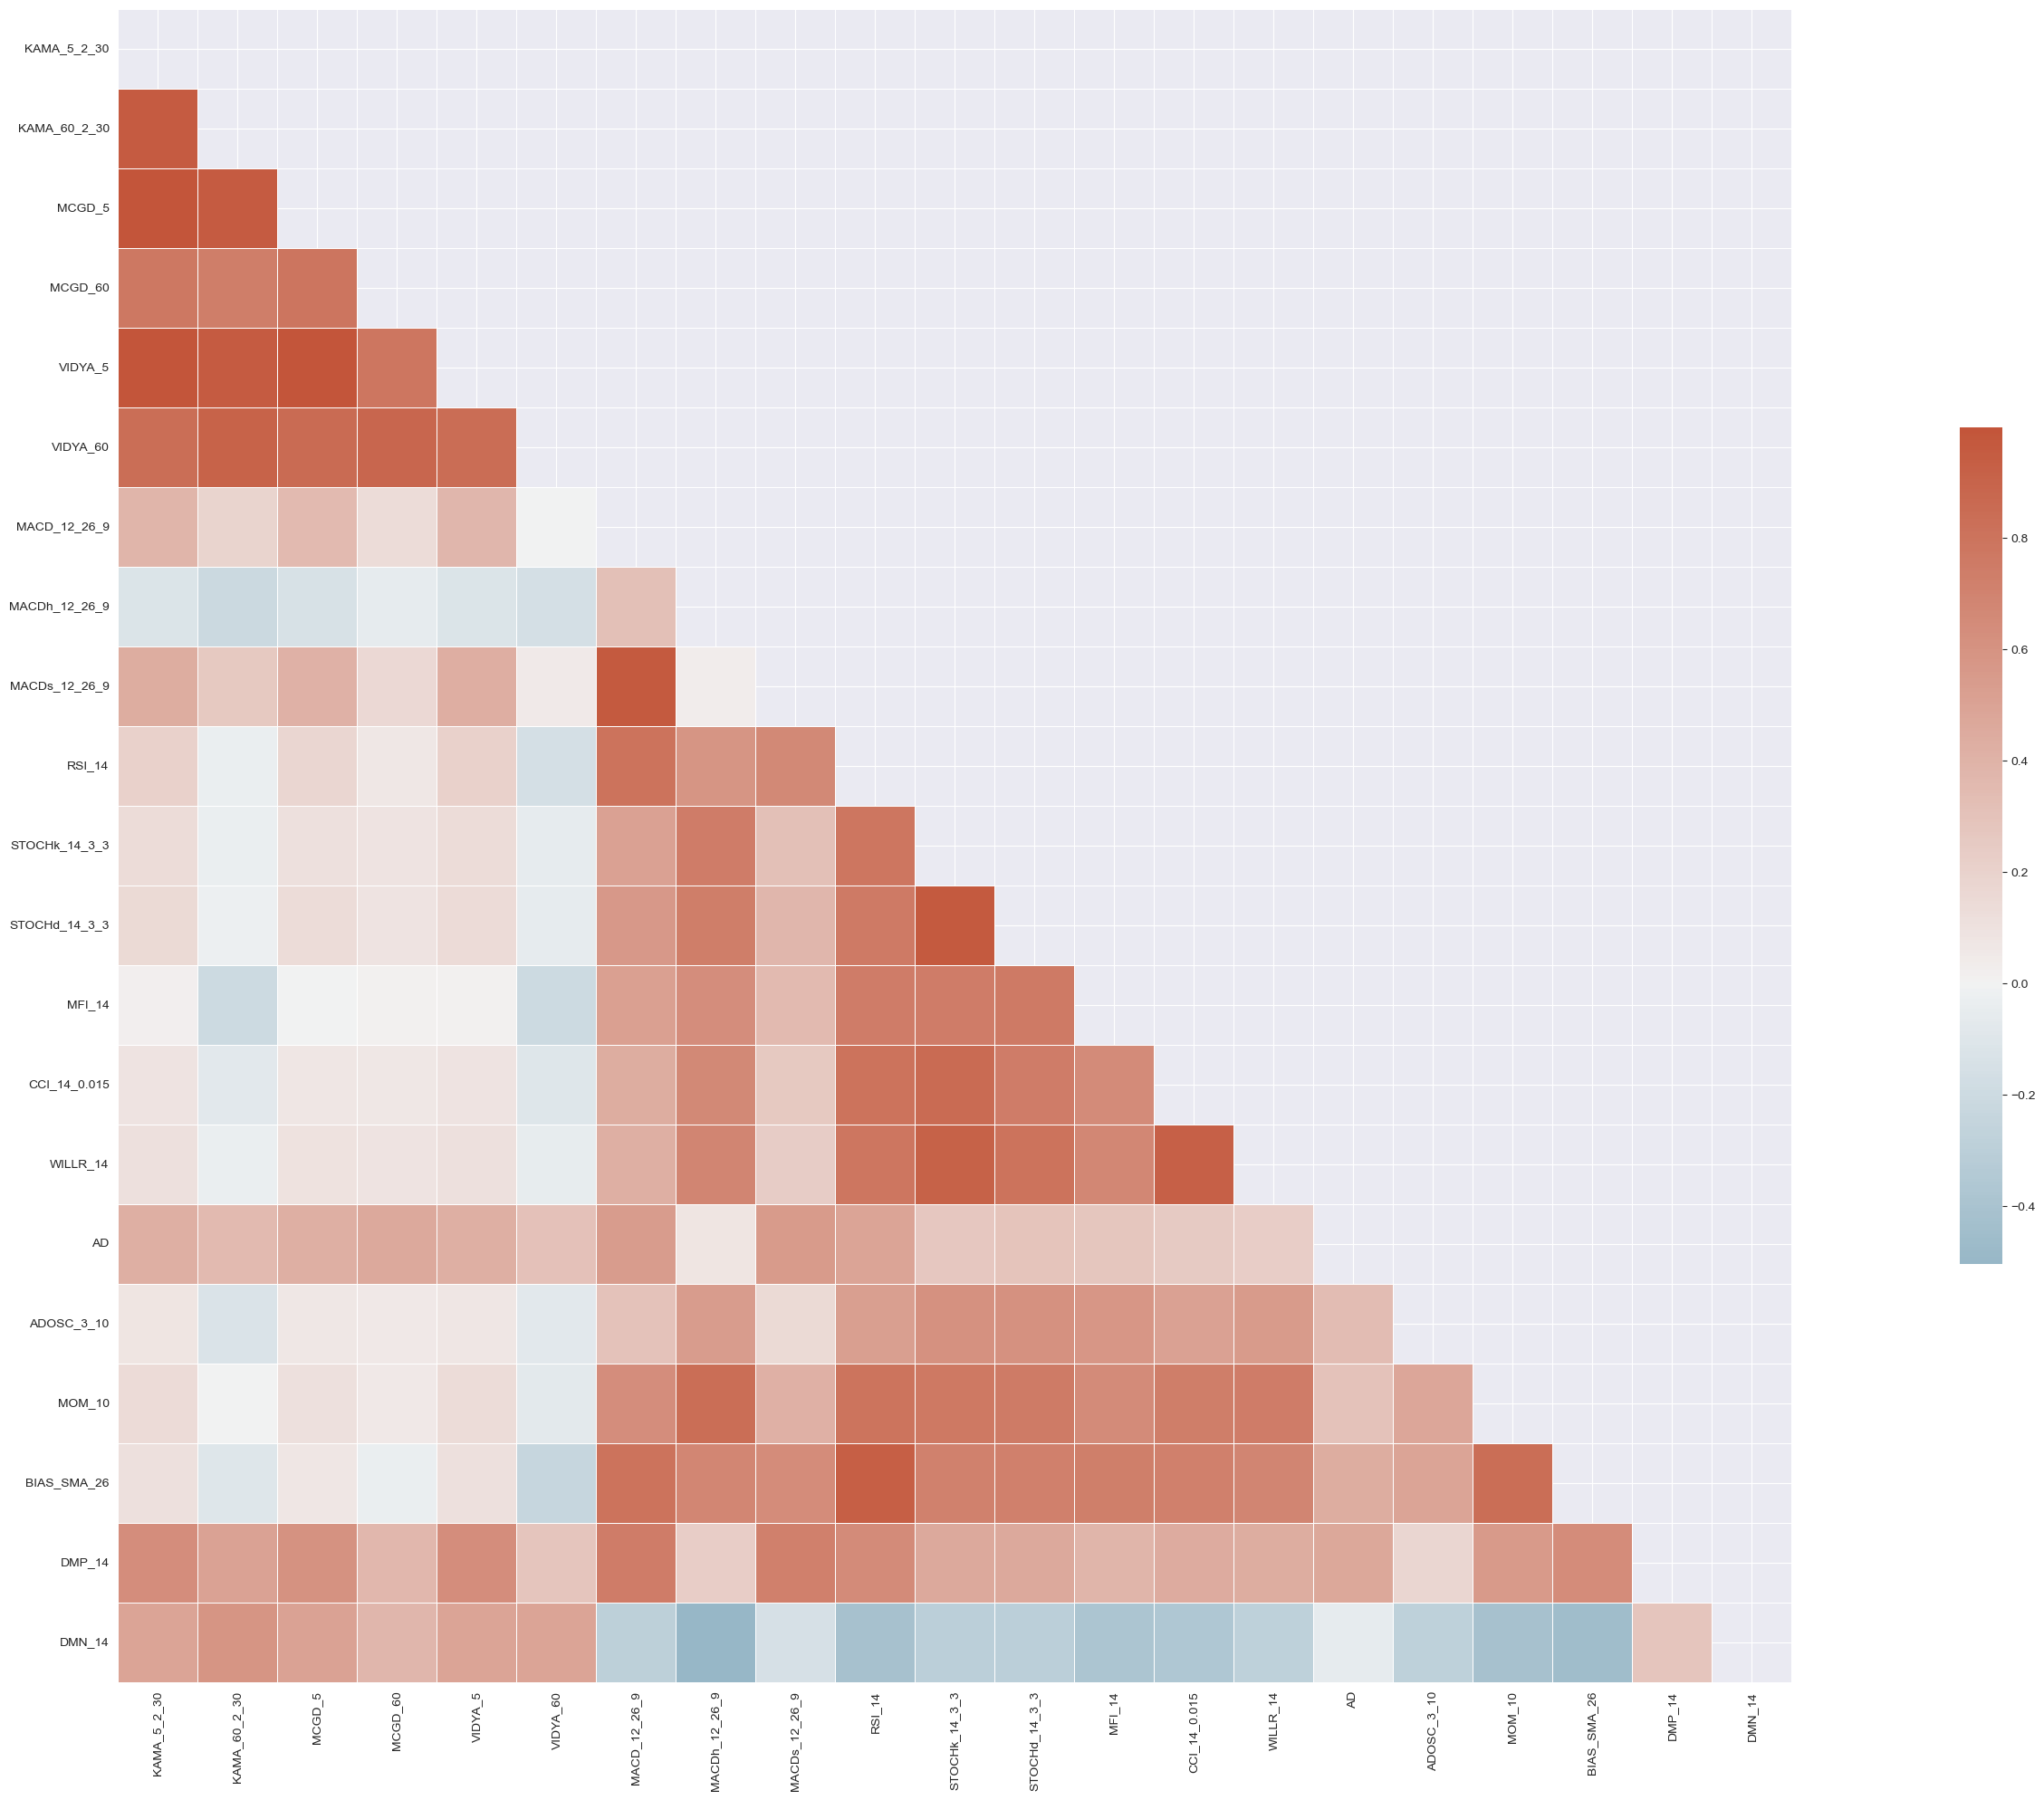

In [15]:
stock_df = df.groupby("STOCK_ID").get_group("2330")  # 獲取特定股票的數據

frames = []
frames.append(
    pta.kama(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],  # 假設你的成交量列名是 'Volume'
        length=5,
    )
)
frames.append(
    pta.kama(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
        length=60,
    )
)

frames.append(
    pta.mcgd(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
        length=5,
    )
)
frames.append(
    pta.mcgd(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
        length=60,
    )
)

frames.append(
    pta.vidya(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
        length=5,
    )
)
frames.append(
    pta.vidya(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
        length=60,
    )
)

frames.append(
    pta.macd(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.rsi(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.stoch(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.mfi(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.cci(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.willr(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.ad(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.adosc(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.mom(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.bias(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)
frames.append(
    pta.dm(
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        open=stock_df["Open"],
        volume=stock_df["Volume"],
    )
)

# Concatenate all technical indicators
ti_df = pd.concat(frames, axis=1)

# Calculate the correlation matrix
corr = ti_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(48, 24))

# Use a diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

In [26]:
df = pd.read_csv("2020-01-01-etf50-tech.csv", dtype={"STOCK_ID": str})
df = df.loc[df.loc[:, "Trading_money"] > 0]

df_frames = []
for stock_id in df.loc[:, "STOCK_ID"].unique():
    stock_df = df.groupby("STOCK_ID").get_group(stock_id)
    stock_df.loc[:, "yesterday_close"] = stock_df.loc[:, "Close"].shift()
    stock_df.loc[:, "year"] = pd.DatetimeIndex(stock_df["Date"]).year
    stock_df.loc[:, "month"] = pd.DatetimeIndex(stock_df["Date"]).month
    stock_df.loc[:, "day"] = pd.DatetimeIndex(stock_df["Date"]).day

    frames = []
    frames.append(
        pta.kama(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=5,
        )
    )
    frames.append(
        pta.kama(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=60,
        )
    )

    frames.append(
        pta.mcgd(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=5,
        )
    )
    frames.append(
        pta.mcgd(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=60,
        )
    )

    frames.append(
        pta.vidya(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=5,
        )
    )
    frames.append(
        pta.vidya(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
            length=60,
        )
    )

    frames.append(
        pta.macd(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.rsi(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.stoch(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.mfi(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.cci(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.willr(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.ad(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.adosc(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.mom(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.bias(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )
    frames.append(
        pta.dm(
            high=stock_df["High"],
            low=stock_df["Low"],
            close=stock_df["Close"],
            open=stock_df["Open"],
            volume=stock_df["Volume"],
        )
    )

    ti_df = pd.concat(frames, axis=1)
    stock_df = pd.concat([stock_df, ti_df], axis=1)
    stock_df = stock_df.dropna()

    df_frames.append(stock_df)

result_df = pd.concat(df_frames, axis=0)
result_df.to_csv("2020-01-01-etf50-tech.csv", index=False, header=True)

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2482434769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:, "yesterday_close"] = stock_df.loc[:, "Close"].shift()
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2482434769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:, "year"] = pd.DatetimeIndex(stock_df["Date"]).year
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4601/2482434769.py:9: SettingWithCopyWarning: 
A value is tryin